In [6]:
import math
from dataclasses import dataclass
# Based on -> https://arxiv.org/abs/1803.09820


@dataclass
class CosineAnnealingLR():
    learning_rate: float = 5e-4
    min_lr: float = learning_rate//20
    tmax: int = 1000
    warm_up: float = 0.30

    def cosine_annealing(self,phase,min,max):
        return min + (max-min) * ((math.cos(math.pi * phase)+1)/2)
    
    def get_lr(self,cur_step:int):
        # warming up phase
        warm_up_steps = self.warm_up * self.tmax
        
        if cur_step <= self.warm_up * self.tmax:
            # Increasing learning rate
            return self.cosine_annealing(cur_step/warm_up_steps,self.learning_rate,self.min_lr)
        
        if cur_step > self.tmax:
            return self.min_lr
        
        phase = cur_step - warm_up_steps
        return self.cosine_annealing(phase/(self.tmax - warm_up_steps),self.min_lr,self.learning_rate)

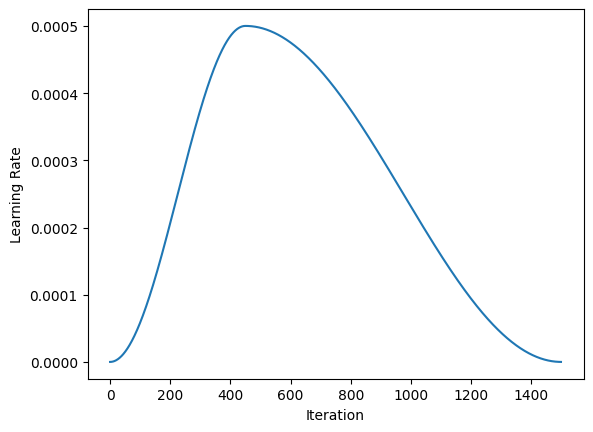

In [7]:
import matplotlib.pyplot as plt
x = list(range(1500))
lr_sched = CosineAnnealingLR(tmax=1500)
y = [lr_sched.get_lr(i) for i in x]
plt.plot(x,y)
# add labels to graph
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()
